<a href="https://colab.research.google.com/github/aryachiranjeev/Mask-RCNN/blob/master/Mask_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision 
import torchvision.transforms as T
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
model=torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
        )
    

In [0]:
def random_color_masks(image):
  colors = [[0, 255, 0],[0, 0, 255],[255, 0, 0],[0, 255, 255],[255, 255, 0],[255, 0, 255],[80, 70, 180],[250, 80, 190],[245, 145, 50],[70, 150, 250],[50, 190, 190]]
  r=np.zeros_like(image).astype(np.uint8)
  g=np.zeros_like(image).astype(np.uint8)
  b=np.zeros_like(image).astype(np.uint8)
  r[image==1],b[image==1],g[image==1]=colors[random.randrange(0,10)]  
  colored_mask=np.stack([r,g,b],axis=2)
  
  return colored_mask

In [0]:
coco_instance_category_names=[ '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

In [0]:
def get_prediction(image_path,threshold):
  img=Image.open(image_path)
  transform=T.Compose([T.ToTensor()])
  img=transform(img)
  model.cuda()
  img = img.cuda()
  pred=model([img])
  pred_score=list(pred[0]['scores'].detach().cpu().numpy())
  pred_t=[pred_score.index(x) for x in pred_score if x>threshold][-1]
  masks=(pred[0]['masks']>0.5).squeeze().detach().cpu().numpy()
  pred_class=[coco_instance_category_names[i] for i in list(pred[0]['labels'])]
  pred_boxes=[[(i[0],i[1]),(i[2],i[3])] for i in list(pred[0]['boxes'].detach().cpu().numpy())]
  masks=masks[:pred_t+1]
  pred_boxes=pred_boxes[:pred_t +1]
  pred_class=pred_class[:pred_t +1]
  
  return masks,pred_boxes,pred_class

In [0]:
def instance_segmentation_api(image_path,threshold,rect_thickness=2,text_size=2,text_thickness=2):
 
  masks,boxes,predict_class= get_prediction(image_path,threshold)
  image=cv2.imread(image_path)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  
  for i in range(len(masks)):
    rgb_mask=random_color_masks(masks[i])
    image=cv2.addWeighted(image,1,rgb_mask,0.5,0)
    cv2.rectangle(image,boxes[i][0],boxes[i][1],color=(0,255,0),thickness=rect_thickness)
    cv2.putText(image,predict_class[i],boxes[i][1],cv2.FONT_HERSHEY_SIMPLEX,text_size,(0,255,0),thickness=text_thickness)
  plt.figure(figsize=(20,30))
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [0]:
img=Image.open("/content/WhatsApp Image 2019-06-26 at 11.26.24 PM.jpeg")
transform=T.Compose([T.ToTensor()])
img=transform(img)

model.cuda()
img = img.cuda()
pred=model([img])

In [8]:
pred[0]

{'boxes': tensor([[7.3262e+02, 1.5044e+02, 9.6131e+02, 5.8189e+02],
         [5.3617e+02, 2.1014e+02, 7.5432e+02, 5.3302e+02],
         [3.6340e+02, 2.2152e+02, 6.2879e+02, 5.6473e+02],
         [2.0740e+02, 2.2560e+02, 4.0906e+02, 7.5246e+02],
         [7.1204e+02, 5.1741e+02, 7.8595e+02, 6.0261e+02],
         [1.8811e-01, 2.0101e+02, 2.6115e+02, 6.6678e+02],
         [9.0542e+02, 2.1872e+02, 1.0400e+03, 6.2908e+02],
         [9.2233e+02, 9.6457e+01, 1.0395e+03, 2.9748e+02],
         [7.5165e+01, 2.1725e+02, 3.1438e+02, 7.6313e+02],
         [3.6635e+02, 5.0051e+02, 1.0348e+03, 7.6563e+02],
         [6.9789e+02, 6.0680e+02, 7.6502e+02, 6.6281e+02],
         [8.5368e+01, 2.3170e+02, 2.7701e+02, 5.4240e+02],
         [8.6146e+02, 5.1986e+02, 9.0250e+02, 5.7855e+02],
         [8.5666e+02, 5.4766e+02, 8.8609e+02, 5.8381e+02],
         [8.7303e+02, 5.5369e+02, 8.9255e+02, 5.8335e+02],
         [7.0665e+02, 5.5857e+02, 7.7654e+02, 6.2115e+02],
         [7.7898e+01, 3.0772e+02, 9.7335e+01, 3

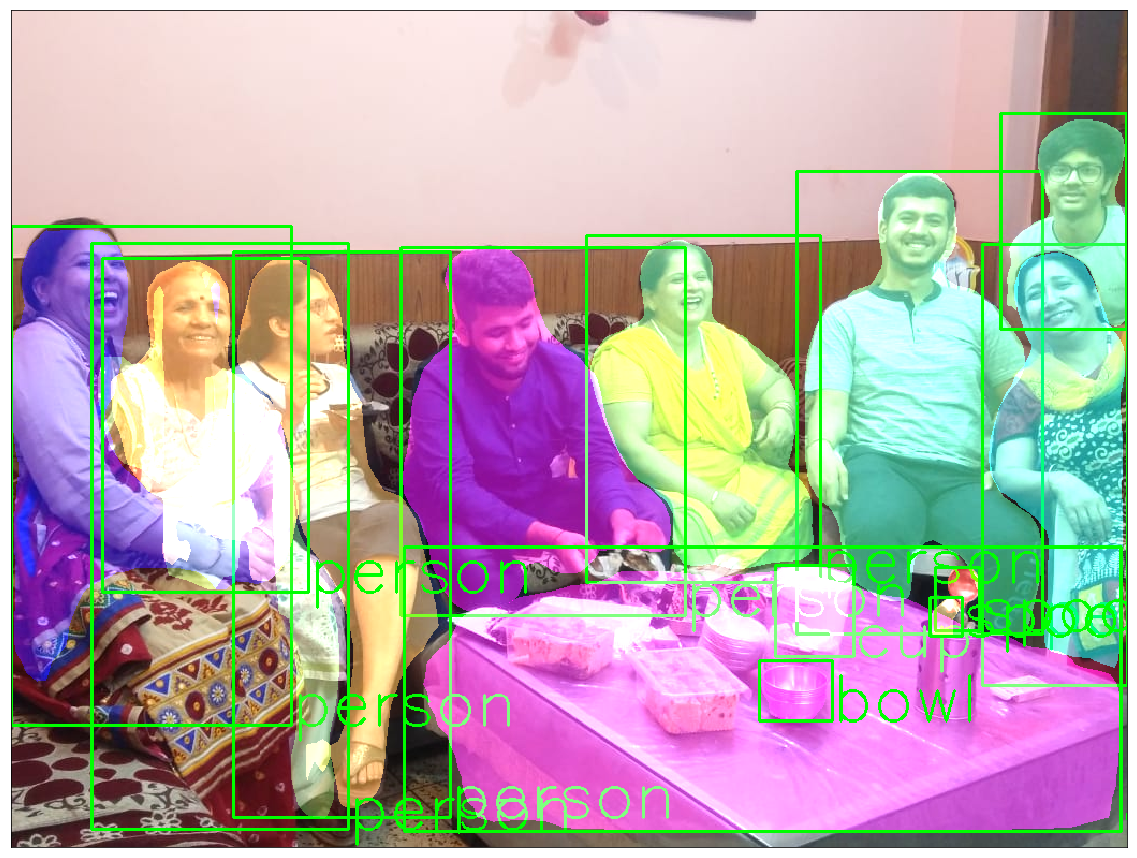

In [9]:
instance_segmentation_api("/content/WhatsApp Image 2019-06-26 at 11.26.24 PM.jpeg",0.70)

(91, 780, 1040)


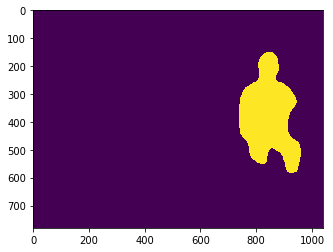

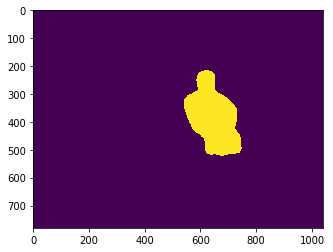

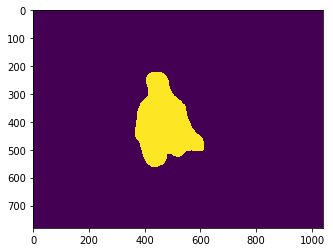

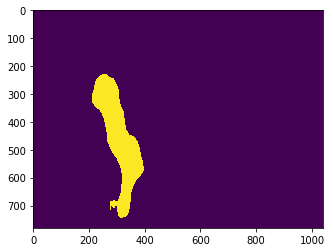

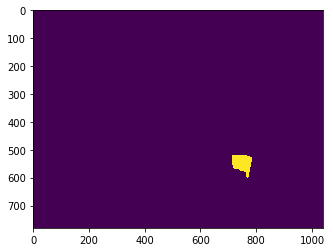

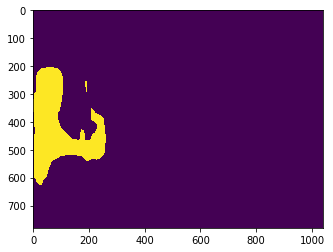

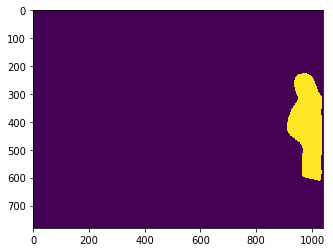

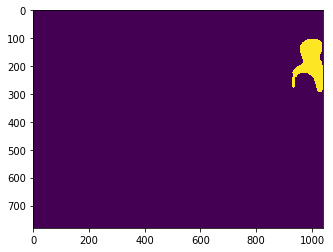

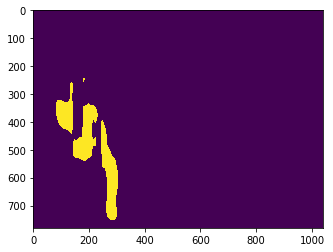

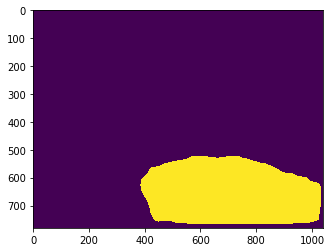

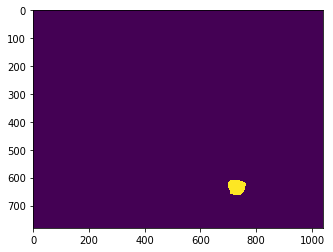

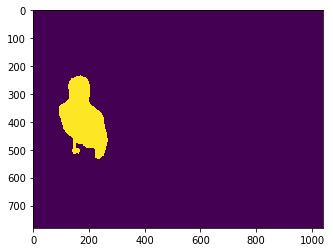

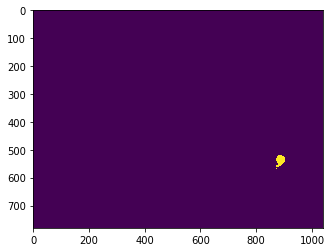

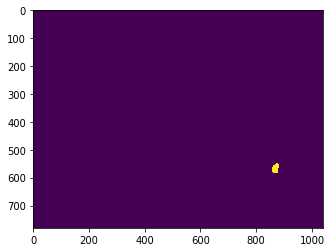

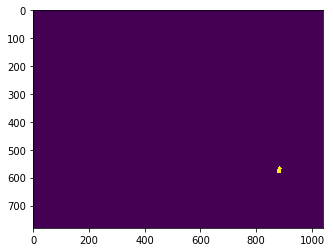

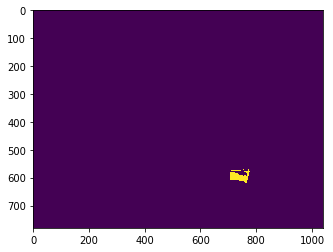

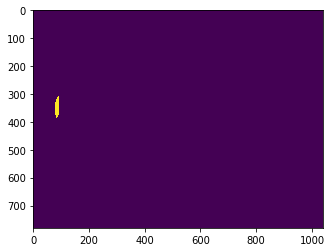

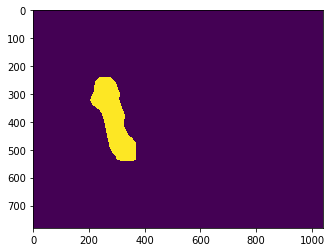

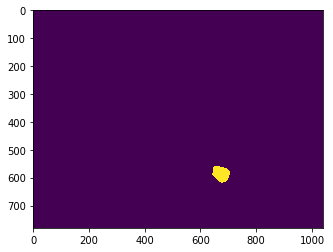

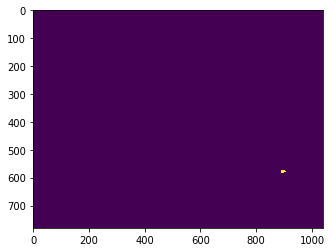

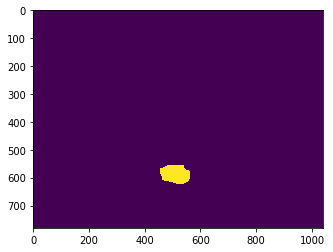

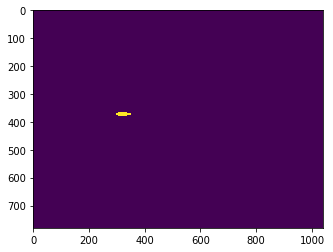

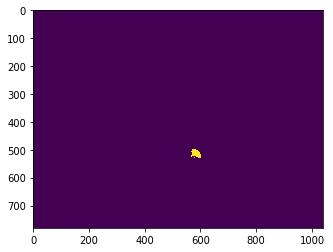

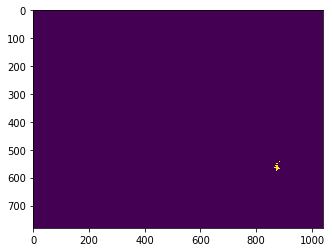

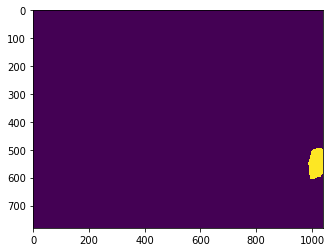

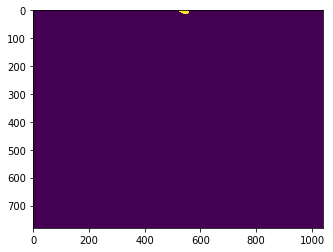

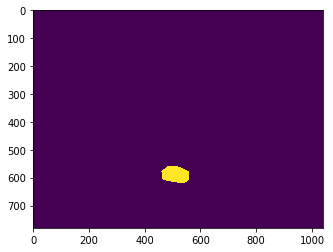

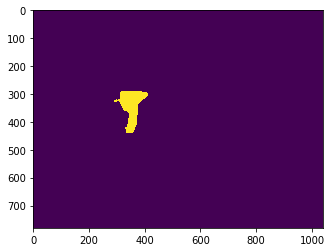

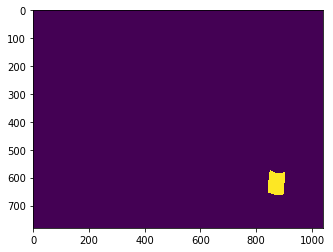

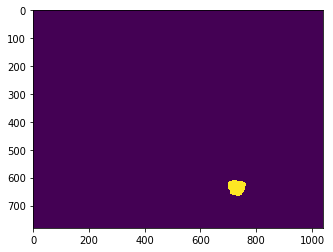

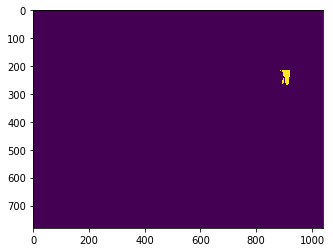

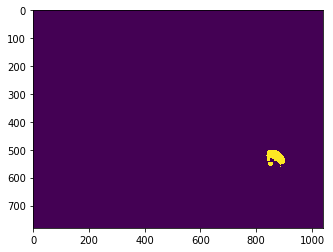

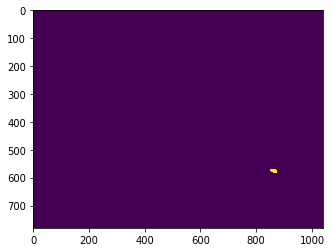

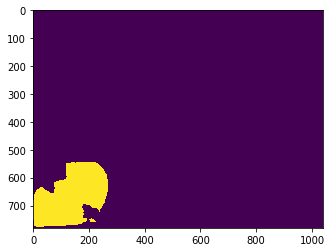

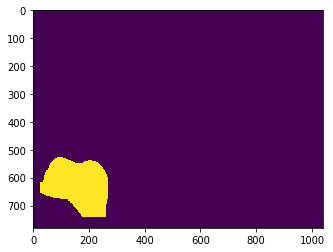

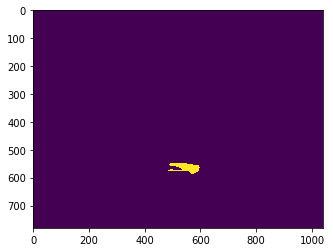

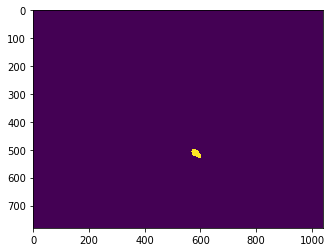

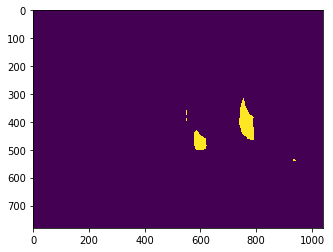

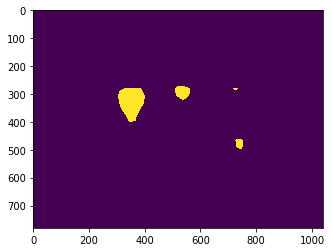

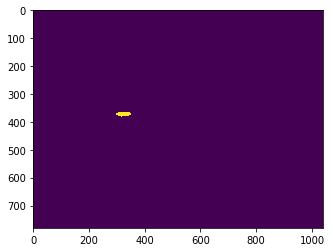

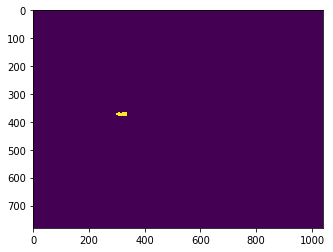

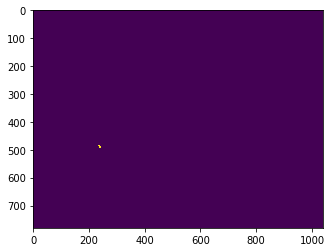

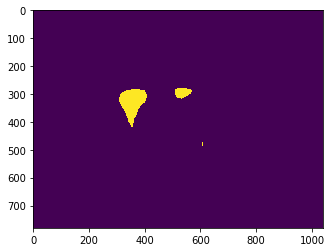

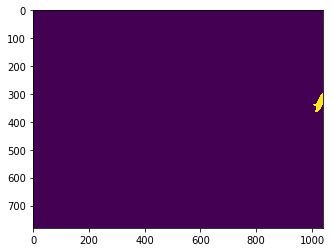

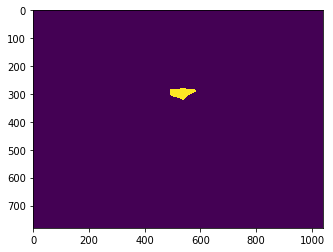

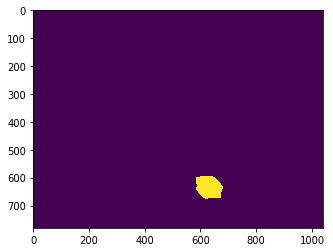

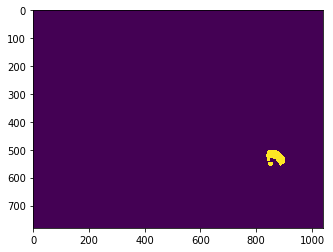

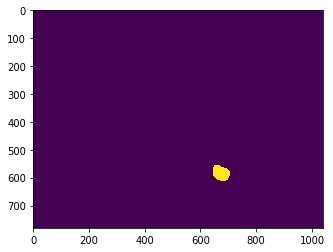

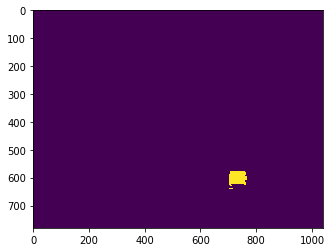

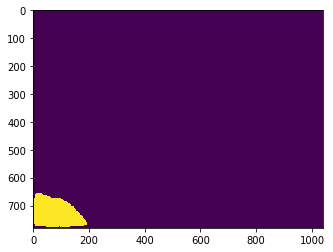

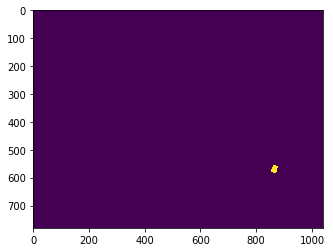

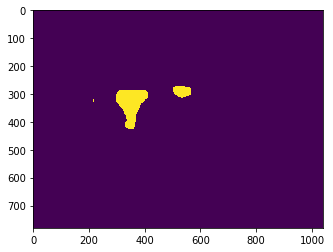

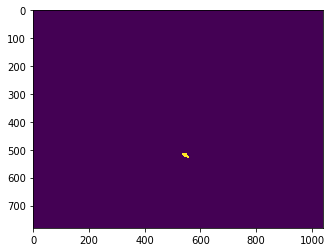

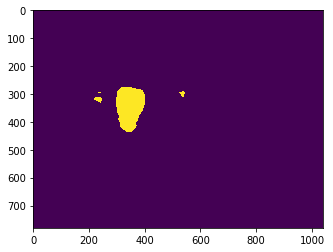

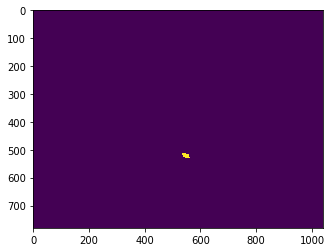

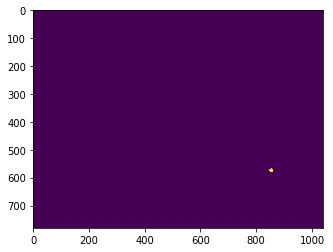

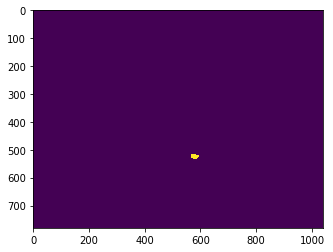

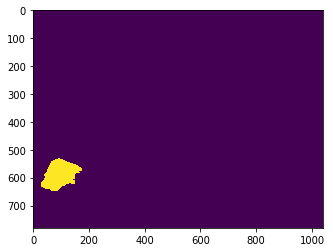

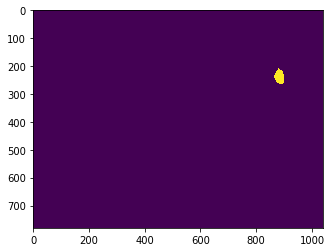

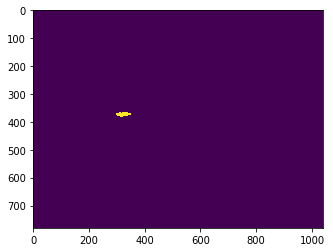

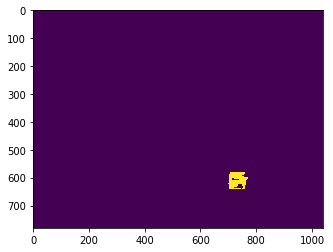

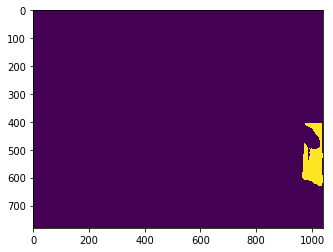

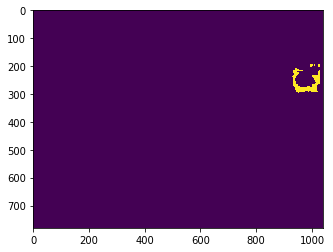

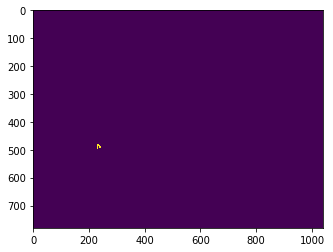

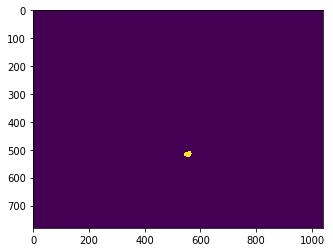

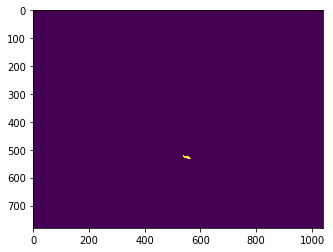

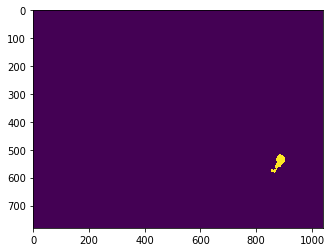

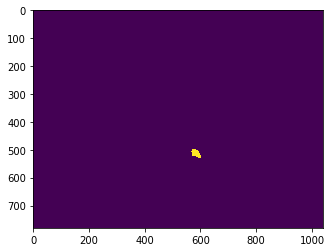

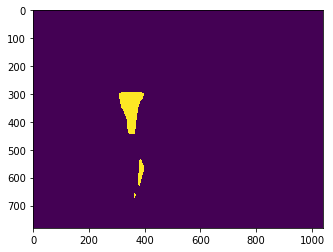

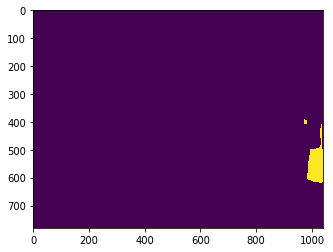

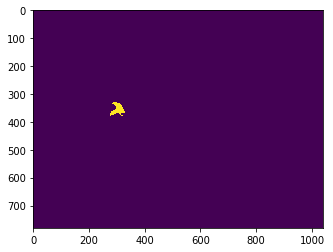

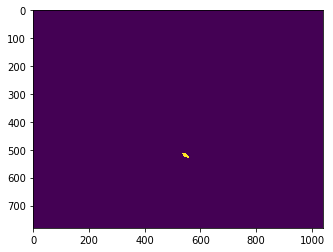

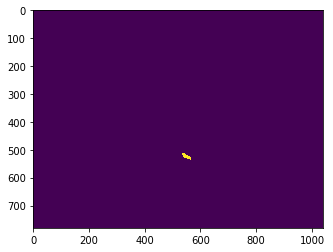

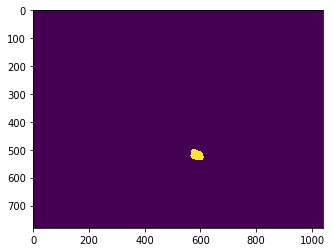

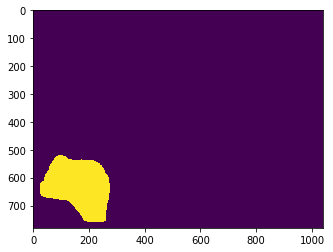

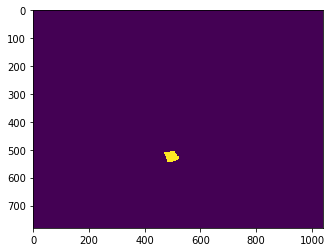

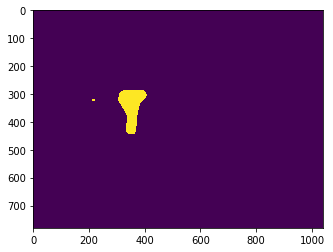

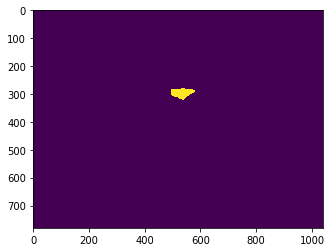

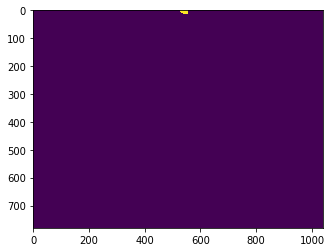

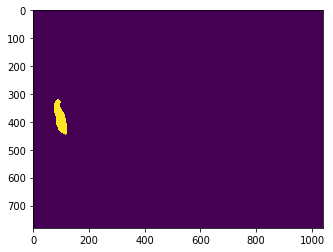

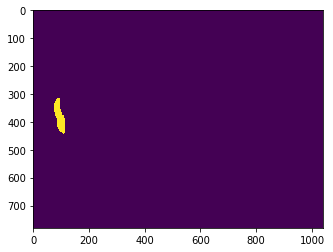

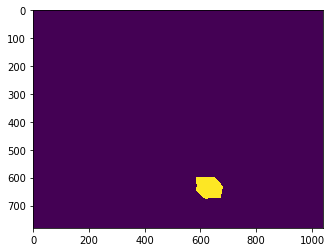

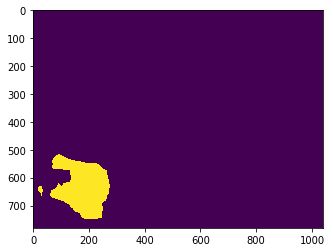

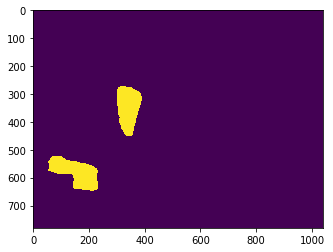

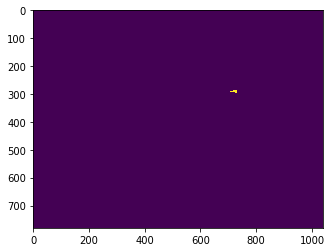

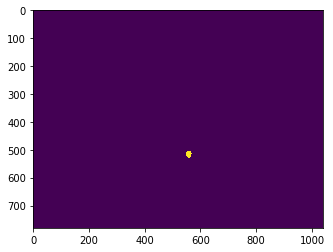

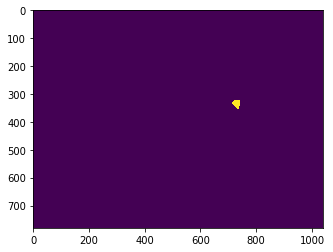

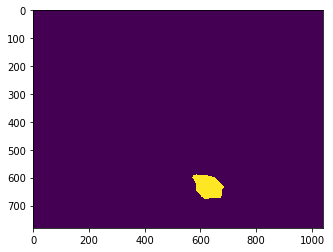

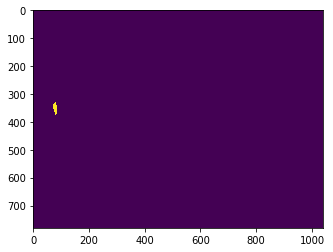

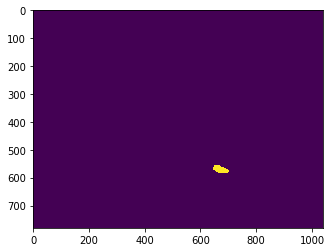

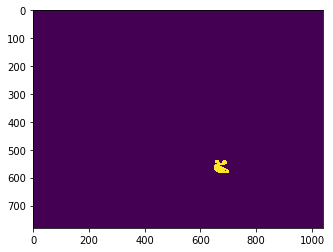

In [10]:
#printing masks
masks=(pred[0]['masks']>0.5).squeeze().detach().cpu().numpy()
print(masks.shape)
for i in range(len(masks)):
  plt.imshow(masks[i])
  plt.show()

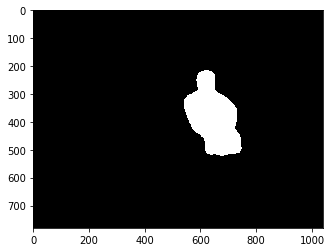

In [11]:
plt.imshow(masks[1],cmap='gray')

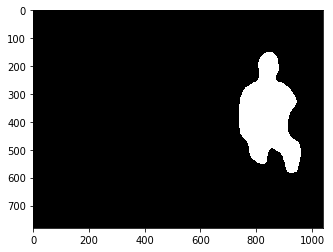

In [12]:
plt.imshow(masks[0], cmap='gray')
plt.show()

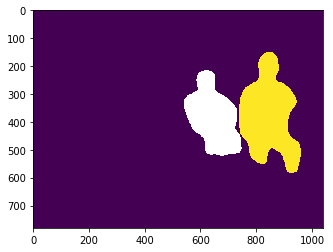

In [13]:
import numpy.ma as ma
combined_masks=ma.masked_array(masks[0]>0,masks[1])
plt.imshow(combined_masks)

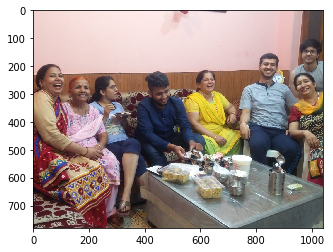

In [14]:
img=plt.imread("/content/WhatsApp Image 2019-06-26 at 11.26.24 PM.jpeg")
plt.imshow(img)

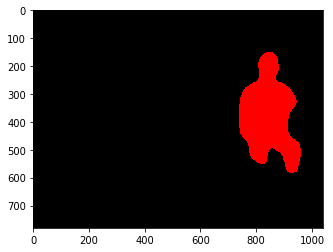

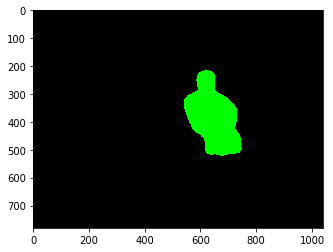

In [15]:
mask1=random_color_masks(masks[0])
mask2=random_color_masks(masks[1])
plt.imshow(mask1)
plt.show()
plt.imshow(mask2)
plt.show()

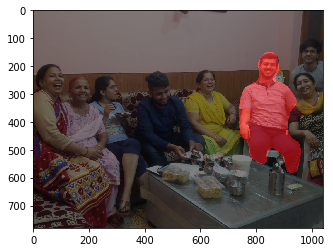

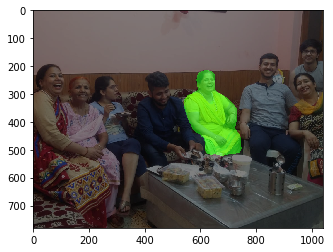

In [16]:
com1=plt.imread("/content/WhatsApp Image 2019-06-26 at 11.26.24 PM.jpeg")
masked1=cv2.addWeighted(img,0.5,mask1,0.5,0)
masked2=cv2.addWeighted(img,0.5,mask2,0.5,0)
plt.imshow(masked1)
plt.show()
plt.imshow(masked2)
plt.show()

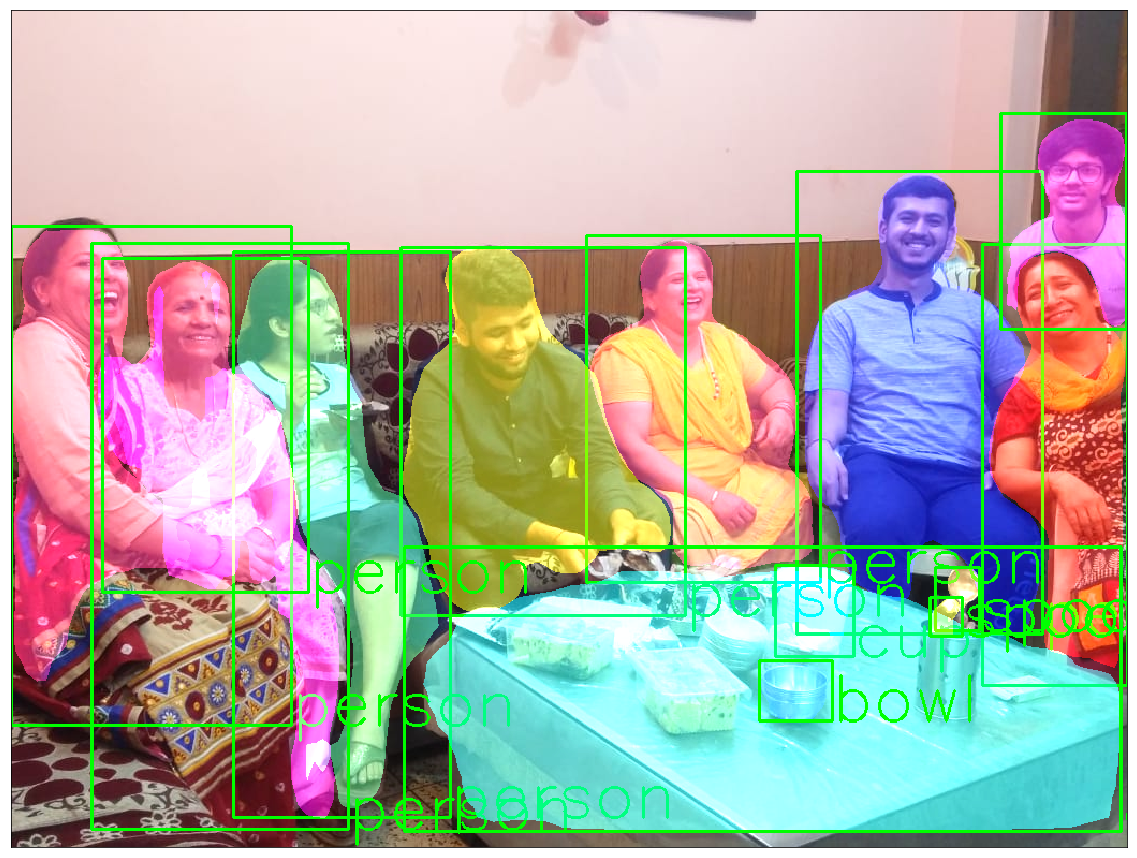

In [17]:
instance_segmentation_api("/content/WhatsApp Image 2019-06-26 at 11.26.24 PM.jpeg",0.75)

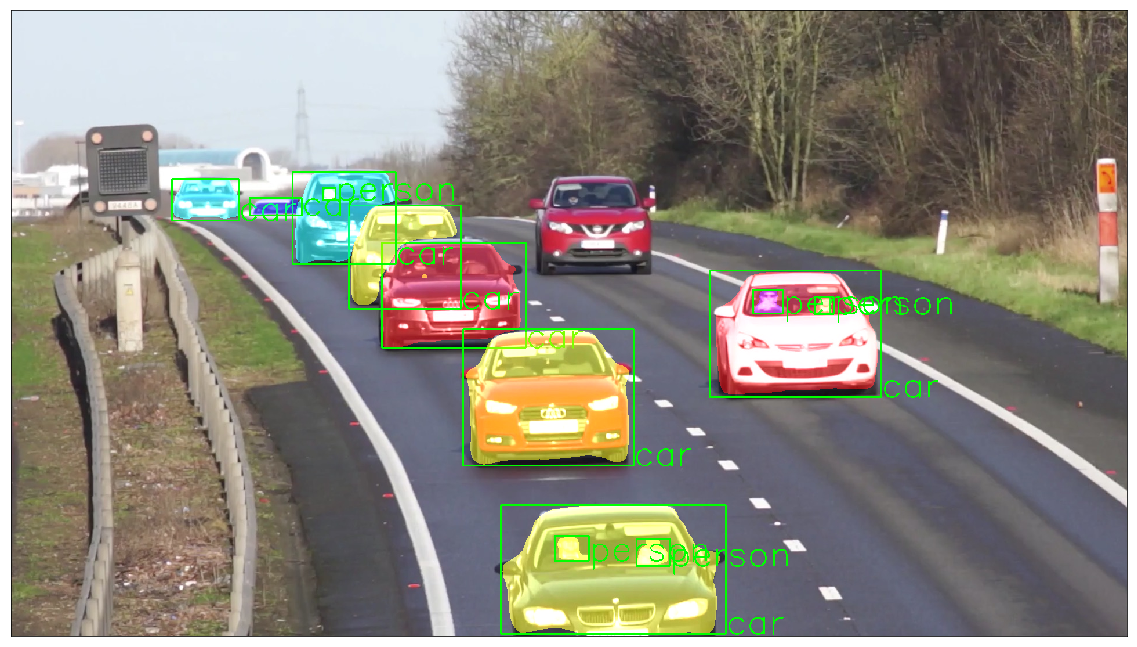

In [18]:
instance_segmentation_api("/content/cars.jpg", 0.70)


In [0]:
import time

def check_inference_time(image_path, gpu=False):
  model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
  model.eval()
  img = Image.open(image_path)
  transform = T.Compose([T.ToTensor()])
  img = transform(img)
  if gpu:
    model.cuda()
    img = img.cuda()
  else:
    model.cpu()
    img = img.cpu()
  start_time = time.time()
  pred = model([img])
  end_time = time.time()
  return end_time-start_time

In [22]:
cpu_time = sum([check_inference_time("/content/WhatsApp Image 2019-06-26 at 11.26.24 PM.jpeg", gpu=False) for _ in range(5)])/5.0
gpu_time = sum([check_inference_time("/content/WhatsApp Image 2019-06-26 at 11.26.24 PM.jpeg", gpu=True) for _ in range(5)])/5.0


print('\n\nAverage Time take by the model with GPU = {}s\nAverage Time take by the model with CPU = {}s'.format(gpu_time, cpu_time))



Average Time take by the model with GPU = 0.17413949966430664s
Average Time take by the model with CPU = 8.757203531265258s
